Index(['Unnamed: 0', 'Xi (micras)', 'Yi', 'Xi^2', 'XiYi', 'Unnamed: 5',
       'Desviacion estandar **', 'St', 'Sy**', 'a1**', 'a0', 'Unnamed: 11',
       'Suma del cuadrado de los residuos', 'ei~~', 'ei^2', 'Sy/x~~', 'r^2',
       'r'],
      dtype='object')


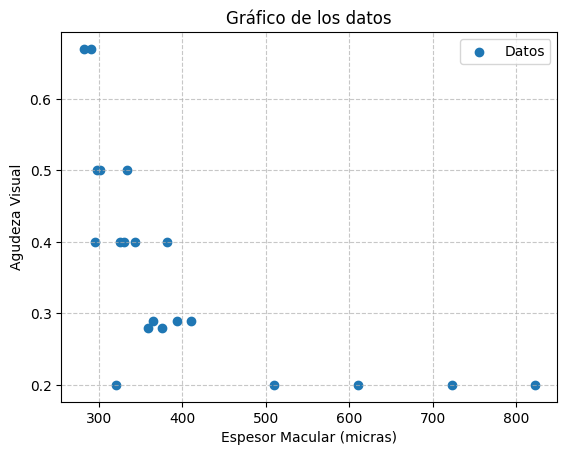

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Leer el archivo Excel
b = pd.read_excel("C:\\Users\\ghoul\\OneDrive\\Escritorio\\BaseDatos.xlsx")
print(b.columns)
# Obtener los valores del Espesor Macular(x) y de la Agudeza Visual(y)
xi = b["Xi (micras)"]
yi = b["Yi"]

# Graficar los datos
plt.scatter(xi, yi, label="Datos")
plt.xlabel("Espesor Macular (micras)")
plt.ylabel("Agudeza Visual")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.title("Gráfico de los datos")
plt.show()

Desviacion Estandar (original):  0.14765803309282605
Error estandar de estimacion (original):  0.11556777765511023
Coeficiente de determinacion (original):  0.5803343403906722
Coeficiente de correlacion (original):  0.7617967841824171

Desviacion Estandar (redondeado):  0.15
Error estandar de estimacion (redondeado):  0.12
Coeficiente de determinacion (redondeado):  0.58
Coeficiente de correlacion (redondeado):  0.76


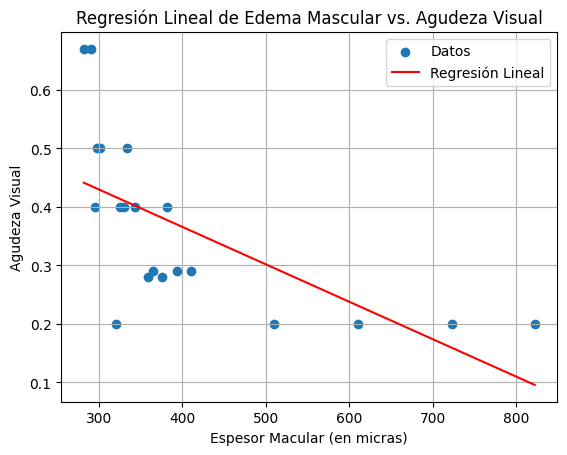

In [2]:
#Codigo Regresion Lineal
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np
wb = pd.read_excel("C:\\Users\\ghoul\\OneDrive\\Escritorio\\BaseDatos.xlsx")
xi = wb["Xi (micras)"].values
yi = wb["Yi"].values
valid_indices = np.where(~np.isnan(xi) & ~np.isnan(yi))
xi = xi[valid_indices]
yi = yi[valid_indices]
n = len(xi)

sumx = sum(xi)
sumy = sum(yi)
sumxy = sum(xi * yi)
sumx2 = sum(xi**2)
sr = 0
sumprx = 0  
sumpry = 0  
sumxy = 0
r2 = 0 

for i in range(n):
    sumxy += (xi[i] - np.mean(xi)) * (yi[i] - np.mean(yi))  
    sumprx += (xi[i] - np.mean(xi)) ** 2  
    sumpry += (yi[i] - np.mean(yi)) ** 2  

xm = np.mean(xi)
ym = np.mean(yi)
a1 = (n * sumxy) / (n * sumx2 - sumx**2)
a0 = ym - a1 * xm

for i in range(n):
    sr += (yi[i] - a0 - a1 * xi[i]) ** 2
S = (sumpry / (n - 1)) ** 0.5
Sy_x = (sr / (n - 2)) ** (0.5)
r2 = sr / sumpry  
r = r2**0.5  

print("Desviacion Estandar (original): ", S)
print("Error estandar de estimacion (original): ", Sy_x)
print("Coeficiente de determinacion (original): ", r2)
print("Coeficiente de correlacion (original): ", r)

# Redondeamos resultados a dos cifras significativas
S_rounded = round(S, 2)
Sy_x_rounded = round(Sy_x, 2)
r2_rounded = round(r2, 2)
r_rounded = round(r, 2)

print("\nDesviacion Estandar (redondeado): ", S_rounded)
print("Error estandar de estimacion (redondeado): ", Sy_x_rounded)
print("Coeficiente de determinacion (redondeado): ", r2_rounded)
print("Coeficiente de correlacion (redondeado): ", r_rounded)

slope, intercept, r_value, p_value, std_err = linregress(xi, yi)

# Generar puntos para la línea de regresión
x_range = [min(xi), max(xi)]
y_range = [slope * x + intercept for x in x_range]

# Trazar los datos y la línea de regresión
plt.scatter(xi, yi, label="Datos")
plt.plot(x_range, y_range, color="red", label="Regresión Lineal")
plt.xlabel("Espesor Macular (en micras)")
plt.ylabel("Agudeza Visual")
plt.legend()
plt.title("Regresión Lineal de Edema Mascular vs. Agudeza Visual")
plt.grid(True)
plt.show()

Index(['Unnamed: 0', 'Xi (micras)', 'Yi', 'Xi^2', 'XiYi', 'Unnamed: 5',
       'Desviacion estandar **', 'St', 'Sy**', 'a1**', 'a0', 'Unnamed: 11',
       'Suma del cuadrado de los residuos', 'ei~~', 'ei^2', 'Sy/x~~', 'r^2',
       'r'],
      dtype='object')
St (original): 0.41425500000000004
Sr (original): 0.15619762394306091
a1 (original): -0.004079642009388167
a0 (original): 1.412039125636778
Desviacion Estandar (original):  0.14765803309282605
Error estandar de estimacion (original):  0.09880461272856297
Coeficiente de determinacion (original):  0.6229432983474891
Coeficiente de correlacion (original):  0.7892675708196106

Desviacion Estandar (redondeado):  0.15
Error estandar de estimacion (redondeado):  0.1
Coeficiente de determinacion (redondeado):  0.62
Coeficiente de correlacion (redondeado):  0.79


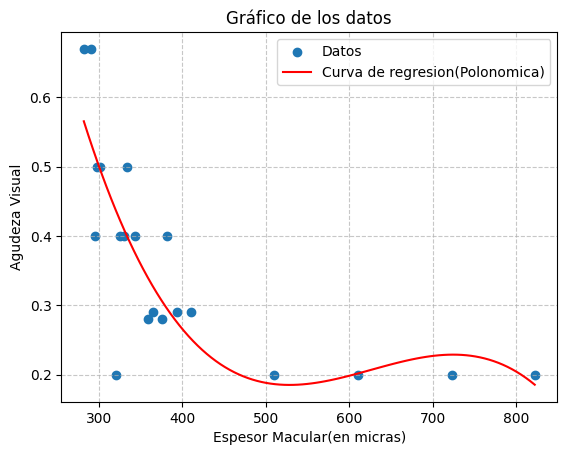

In [10]:
#Codigo de Regresion Polinomial
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


wb = pd.read_excel("C:\\Users\\ghoul\\OneDrive\\Escritorio\\BaseDatos.xlsx")


def gauss_elimination(matriz):
    n = len(matriz)
    for i in range(n):
        max_row = i
        for j in range(i + 1, n):
            if abs(matriz[j][i]) > abs(matriz[max_row][i]):
                max_row = j
        matriz[i], matriz[max_row] = matriz[max_row], matriz[i]
        diagonal_element = matriz[i][i]
        for j in range(i, n + 1):
            matriz[i][j] /= diagonal_element
        for j in range(n):
            if j != i:
                factor = matriz[j][i]
                for k in range(i, n + 1):
                    matriz[j][k] -= factor * matriz[i][k]
    m = [fila[n] for fila in matriz]
    return m


print(wb.columns)
xi = wb["Xi (micras)"].values
yi = wb["Yi"].values
valid_indices = np.where(~np.isnan(xi) & ~np.isnan(yi))
xi = xi[valid_indices]
yi = yi[valid_indices]
n = len(xi)

sumx = sum(xi)
sumy = sum(yi)
sumxy = sum(xi * yi)
sumx2 = sum(xi**2)
sumx3 = sum(xi**3)
sumx4 = sum(xi**4)
sumx2y = sum(xi**2 * yi)

#Creacion de matriz para trabajar los coeficientes del sistema de ecuaciones lineal
matriz = [
    [n, sumx, sumx2, sumy],
    [sumx, sumx2, sumx3, sumxy],
    [sumx2, sumx3, sumx4, sumx2y],
]

Resultado_matriz = gauss_elimination(matriz)
a2 = Resultado_matriz[2]
a1 = Resultado_matriz[1]
a0 = Resultado_matriz[0]

xm = sumx / n
ym = sumy / n

st = 0
sr = 0
Sumprx = 0

for i in range(n):
    sr += (yi[i] - a0 - a1 * xi[i] - a2 * xi[i] ** 2) ** 2
    st += (yi[i] - ym) ** 2
    Sumprx += (yi[i] - ym) ** 2
print("St (original):", st)
print("Sr (original):", sr)
print("a1 (original):", a1)
print("a0 (original):", a0)
gp = 3
Sy_x = (sr / (n - (gp + 1))) ** 0.5
S = (Sumprx / (n - 1)) ** 0.5

st = 0
for i in range(n):
    st += (yi[i] - ym) ** 2
r2 = (st - sr) / st
r = r2**0.5

print("Desviacion Estandar (original): ", S)
print("Error estandar de estimacion (original): ", Sy_x)
print("Coeficiente de determinacion (original): ", r2)
print("Coeficiente de correlacion (original): ", r)

# Redondeamos el resultado a dos cifras significativas
S_rounded = round(S, 2)
Sy_x_rounded = round(Sy_x, 2)
r2_rounded = round(r2, 2)
r_rounded = round(r, 2)

print("\nDesviacion Estandar (redondeado): ", S_rounded)
print("Error estandar de estimacion (redondeado): ", Sy_x_rounded)
print("Coeficiente de determinacion (redondeado): ", r2_rounded)
print("Coeficiente de correlacion (redondeado): ", r_rounded)

coeficientes = np.polyfit(xi, yi, gp)
polinomial = np.poly1d(coeficientes)

x_range = np.linspace(min(xi), max(xi), 100)
y_pred = polinomial(x_range)

plt.scatter(xi, yi, label="Datos")
plt.plot(x_range, y_pred, color="red", label="Curva de regresion(Polonomica)")
plt.xlabel("Espesor Macular(en micras)")
plt.ylabel("Agudeza Visual")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.title("Gráfico de los datos")
plt.show()

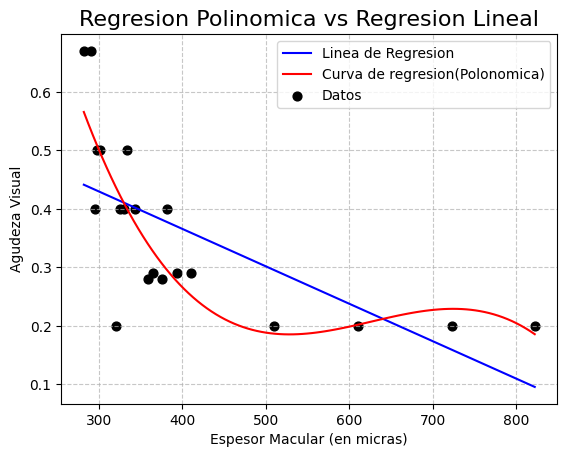

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

wb = pd.read_excel("C:\\Users\\ghoul\\OneDrive\\Escritorio\\BaseDatos.xlsx")
xi = wb["Xi (micras)"].values
yi = wb["Yi"].values
valid_indices = np.where(~np.isnan(xi) & ~np.isnan(yi))
xi = xi[valid_indices]
yi = yi[valid_indices]
n = len(xi)
gp = 3
coeficientes = np.polyfit(xi, yi, gp)
polinomial = np.poly1d(coeficientes)

x_range = np.linspace(min(xi), max(xi), 100)
y_pred = polinomial(x_range)

slope, intercept, r_value, p_value, std_err = linregress(xi, yi)

# Se corrige la grafica de la linea de regresion
y_pred_linear = slope * x_range + intercept

plt.plot(x_range, y_pred_linear, color="blue", label="Linea de Regresion")
plt.plot(x_range, y_pred, color="red", label="Curva de regresion(Polonomica)")
plt.scatter(xi, yi, label="Datos", color="black", marker="o", s=40)
plt.xlabel("Espesor Macular (en micras)")
plt.ylabel("Agudeza Visual")
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.title("Regresion Polinomica vs Regresion Lineal", fontsize=16)
plt.show()

Error relativo promedio para interpolación de Polinomio de Lagrange grado 1: 0.00000000%
Error relativo promedio para interpolación de Polinomio de Lagrange grado 2: 0.00000000%
Error relativo promedio para interpolación de Polinomio de Lagrange grado 3: 0.00000000%
Error relativo promedio para interpolación de Polinomio de Lagrange grado 4: 0.00000000%


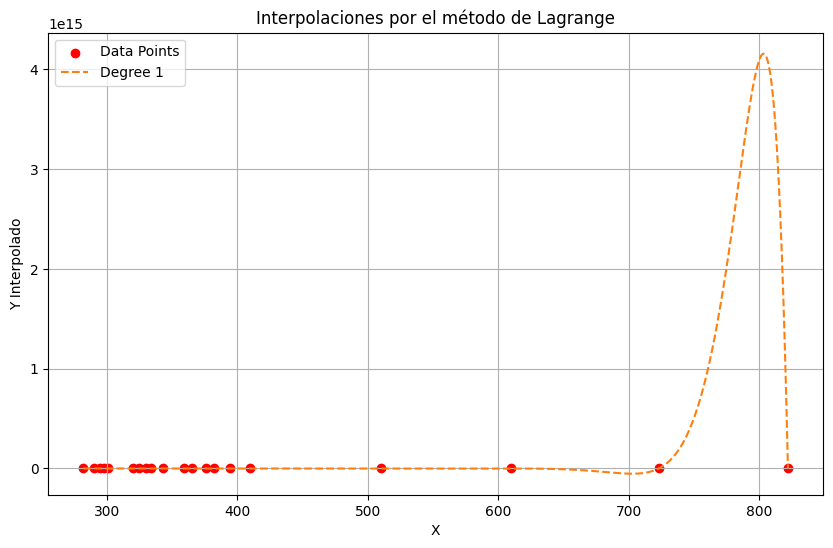

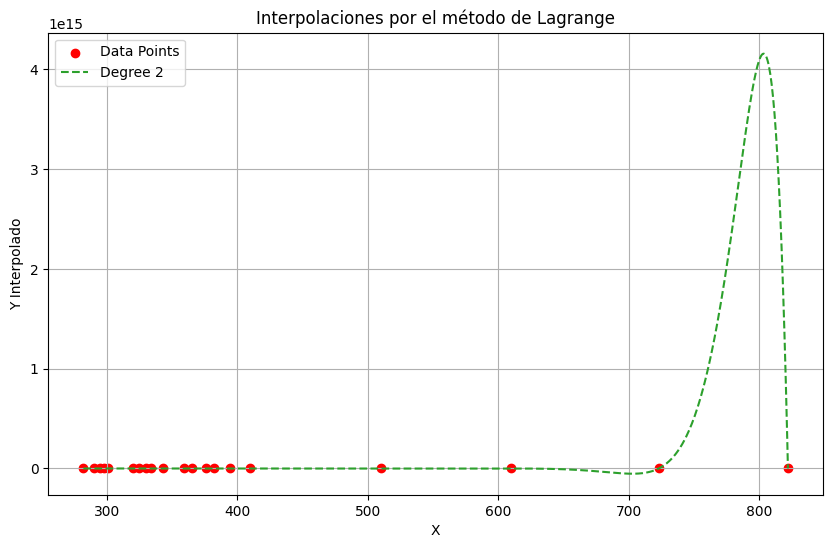

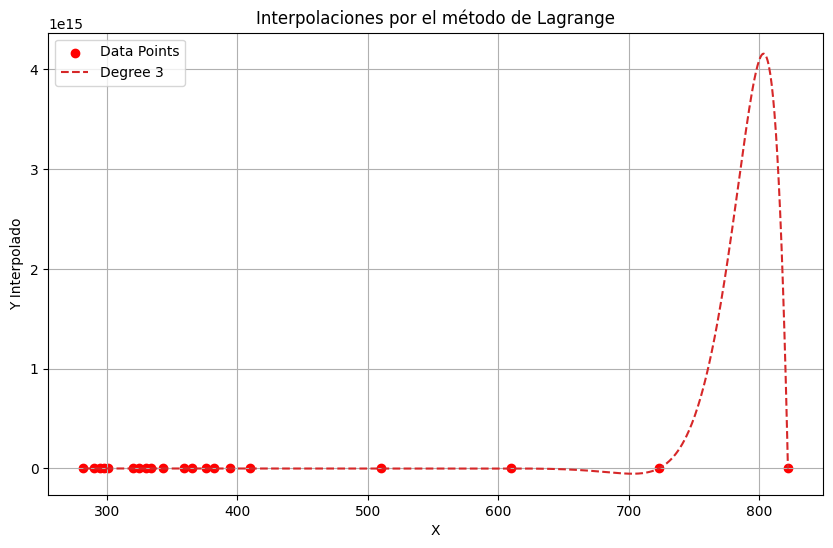

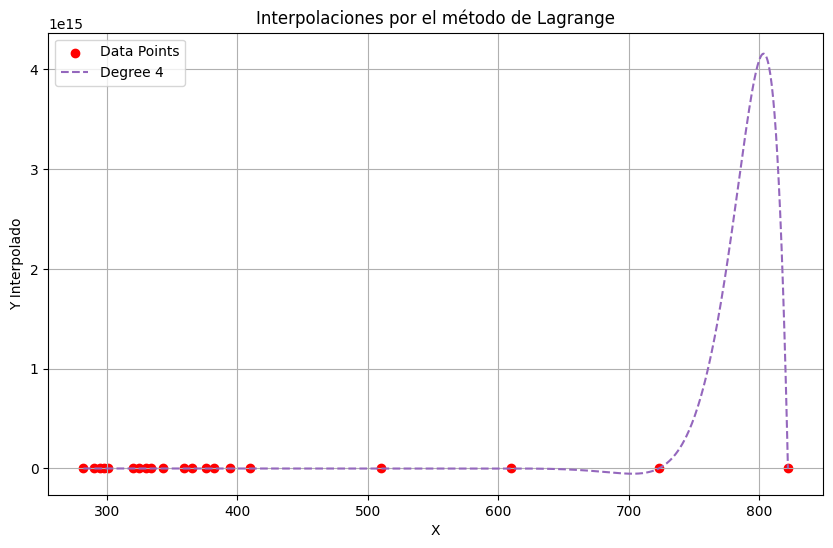

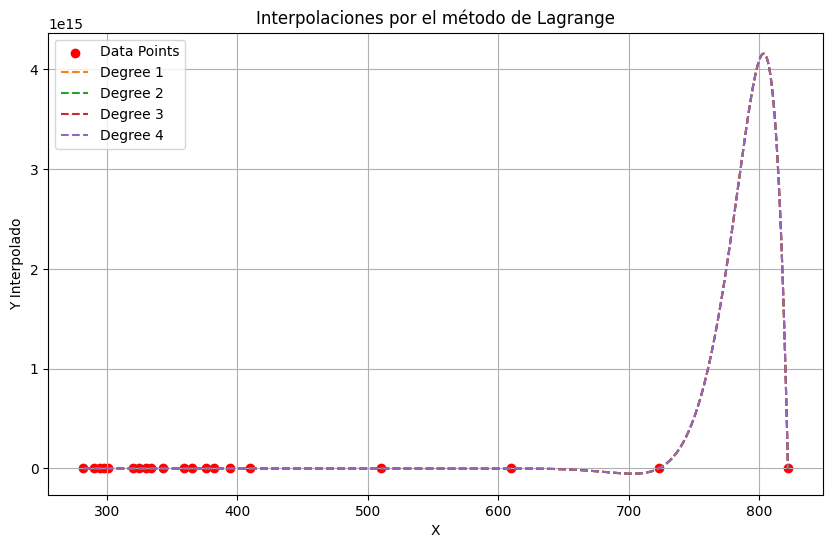

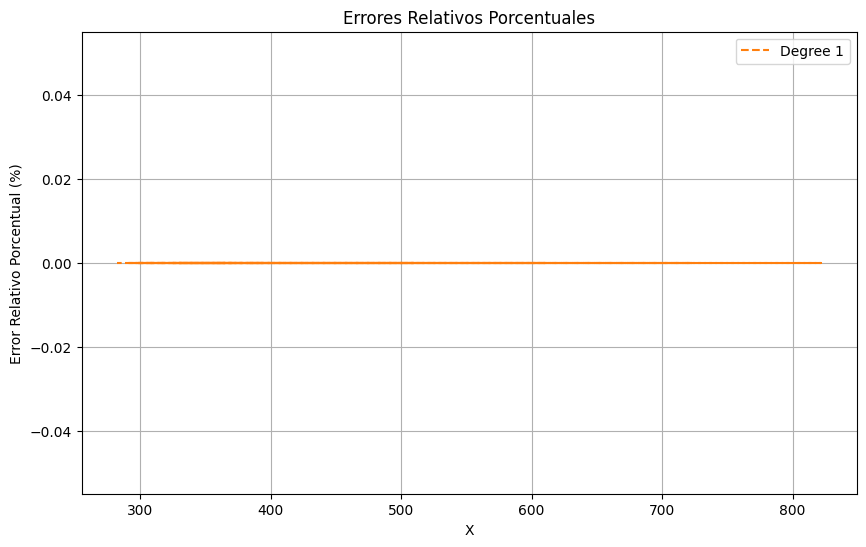

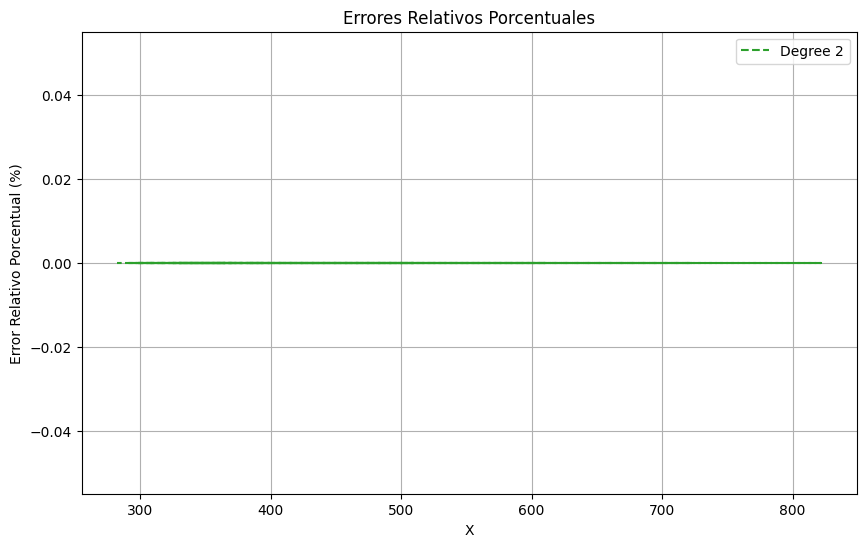

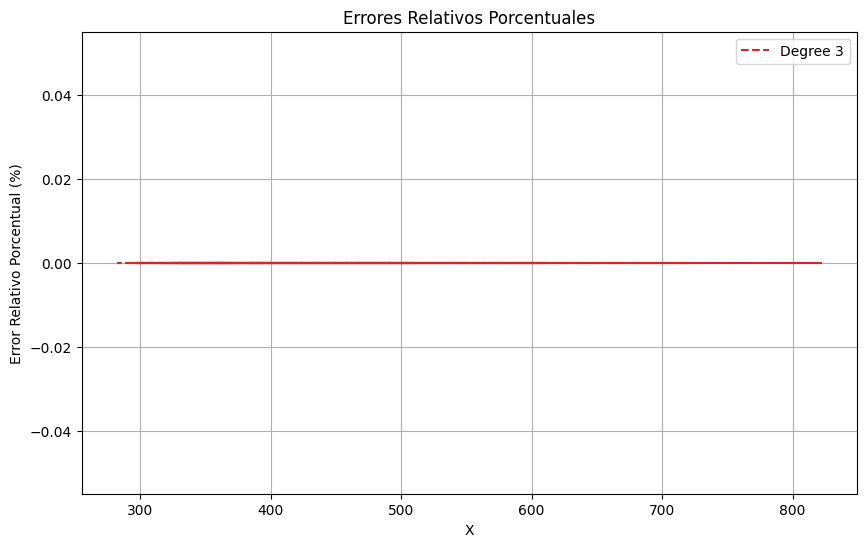

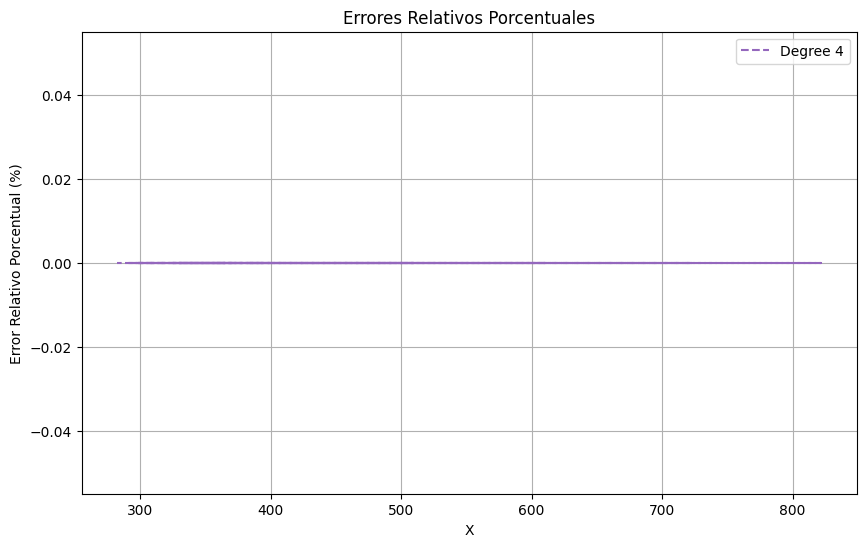

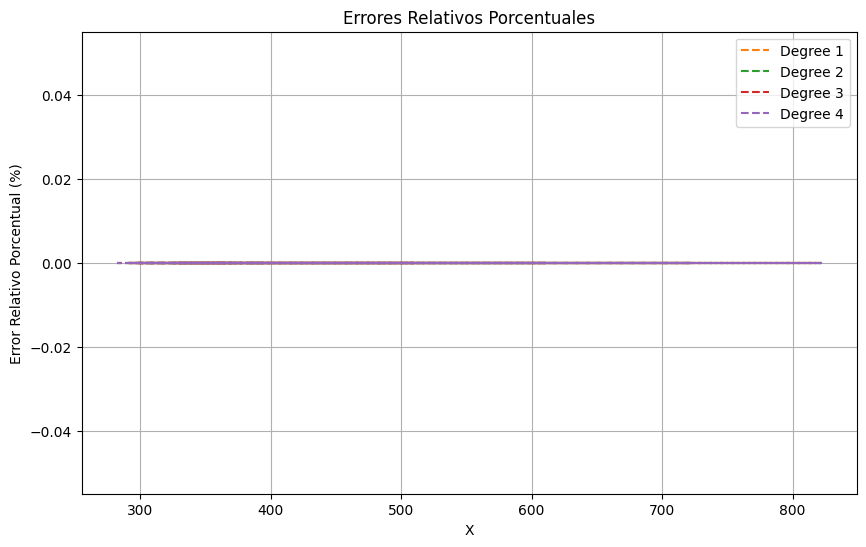

In [15]:
#Codigo de Interpolacion
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(x, y, x_interp, degree):
    n = len(x)
    y_interp = np.zeros_like(x_interp)
    for j in range(n):
        p = np.ones_like(x_interp)
        for i in range(n):
            if i!= j:
                p *= (x_interp - x[i]) / (x[j] - x[i])
        y_interp += y[j] * p
    return y_interp

def relative_error(y_true, y_pred):
    return np.abs((y_true - y_pred) / y_true) * 100

def main():
    # Cargar los datos desde el archivo Excel
    df = pd.read_excel("C:\\Users\\ghoul\\OneDrive\\Escritorio\\BaseDatos.xlsx")

    # Obtener las columnas de datos X e Y
    x = df['Xi (micras)'].values[:20]
    y = df['Yi'].values[:20]

    x_unique = np.unique(x)
    y_unique = np.array([y[np.where(x == xi)[0][0]] if xi in x else np.nan for xi in x_unique])

    valid_indices = ~np.isnan(y_unique)
    x_unique = x_unique[valid_indices]
    y_unique = y_unique[valid_indices]

    if np.any(np.isnan(y_unique)):
        print("¡Hay valores NaN en los datos únicos de Y!")
    if np.any(np.isinf(y_unique)):
        print("¡Hay valores infinitos en los datos únicos de Y!")

    x_interp = np.linspace(min(x), max(x), 1000)

    interpolations = {}
    errors = {}

    for degree in range(1, 5):
        y_interp = lagrange_interpolation(x_unique, y_unique, x_interp, degree)
        interpolations[degree] = y_interp

        if np.any(np.isnan(interpolations[degree])):
            print(f"¡Hay valores NaN en los datos de interpolación de grado {degree}!")
        if np.any(np.isinf(interpolations[degree])):
            print(f"¡Hay valores infinitos en los datos de interpolación de grado {degree}!")

        y_interp_at_x = lagrange_interpolation(x_unique, y_unique, x, degree)
        errors_degree = relative_error(y, y_interp_at_x)
        if degree not in errors:
            errors[degree] = []
        errors[degree].extend(errors_degree)
        
    er_promedio = {}
    for degree in errors:
        er_promedio[degree]= np.mean(errors[degree])
        print(f'Error relativo promedio para interpolación de Polinomio de Lagrange grado {degree}: {er_promedio[degree]:.8f}%')

    # Trazar los datos originales (incluyendo los puntos duplicados)
    
    for degree in interpolations:
        plt.figure(figsize=(10, 6))
        plt.scatter(df['Xi (micras)'], df['Yi'], color='red', label='Data Points')
        plt.plot(x_interp, interpolations[degree], label=f'Degree {degree}', linestyle='--', linewidth=1.5, color=f'C{degree}')
        plt.xlabel('X')
        plt.ylabel('Y Interpolado')
        plt.title('Interpolaciones por el método de Lagrange')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    plt.figure(figsize=(10, 6))
    plt.scatter(df['Xi (micras)'], df['Yi'], color='red', label='Data Points')
    for degree in interpolations:
        plt.plot(x_interp, interpolations[degree], label=f'Degree {degree}', linestyle='--', linewidth=1.5, color=f'C{degree}')

    plt.xlabel('X')
    plt.ylabel('Y Interpolado')
    plt.title('Interpolaciones por el método de Lagrange')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    for degree in errors:
        plt.figure(figsize=(10, 6))
        plt.plot(x, errors[degree], label=f'Degree {degree}', linestyle='--', linewidth=1.5, color=f'C{degree}')
        plt.xlabel('X')
        plt.ylabel('Error Relativo Porcentual (%)')
        plt.title('Errores Relativos Porcentuales')
        plt.legend()
        plt.grid(True)
        plt.show()

    # Trazar los errores relativos
    plt.figure(figsize=(10, 6))
    for degree in errors:
        plt.plot(x, errors[degree], label=f'Degree {degree}', linestyle='--', linewidth=1.5, color=f'C{degree}')
    plt.xlabel('X')
    plt.ylabel('Error Relativo Porcentual (%)')
    plt.title('Errores Relativos Porcentuales')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()